# Library importations

In [243]:
import numpy as np
import pandas as pd
import math
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import librosa, librosa.display
import IPython.display as ipd

/kaggle/input/bruh-sound/ytmp3free.cc_bruh-sound-effect-youtubemp3free.org.mp3
/kaggle/input/submarine-audio/submarines_audio.wav


# Signal loading

In [244]:
def load_a_sound(dir):
    sound, sr = librosa.load(dir)
    print("Length of the one sample is {0:.6f}s".format(1/sr))
    print("Length of the whole signal is {0:.2f}s".format(1/sr*len(sound)))
    return sound

In [245]:
sound = load_a_sound("/kaggle/input/submarine-audio/submarines_audio.wav")

Length of the one sample is 0.000045s
Length of the whole signal is 8.32s


In [246]:
ipd.Audio("/kaggle/input/submarine-audio/submarines_audio.wav")

# Signal analyzing in the time domain

In [247]:
def show_in_time_domain(sound, title):
    plt.figure(figsize=(15,5))
    librosa.display.waveshow(sound, alpha=0.5)
    plt.title(title)
    plt.ylim(-1,1)
    plt.show()

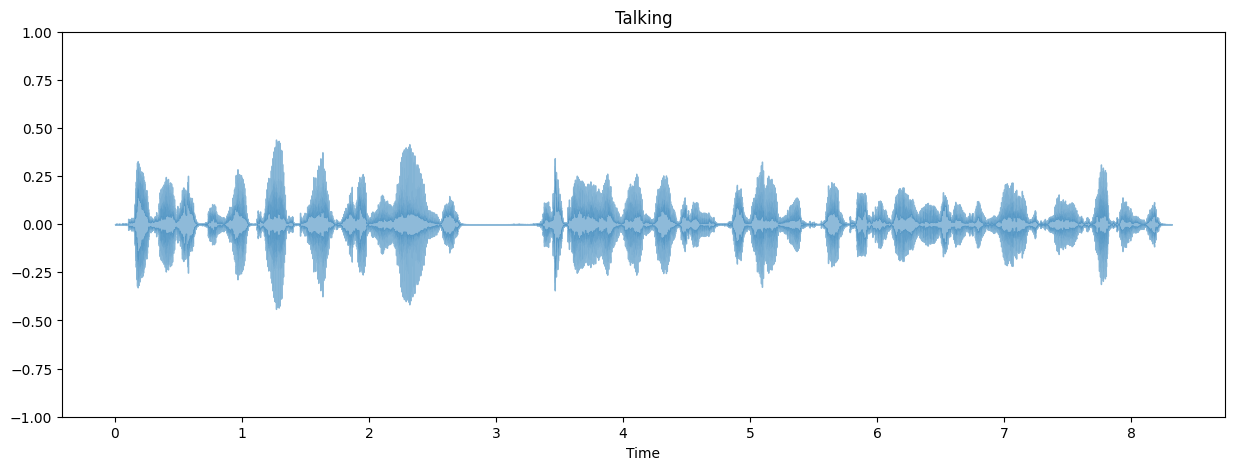

In [248]:
show_in_time_domain(sound, "Talking")

# Root-mean squared energy (RMS)

In [249]:
def rms(signal, frame_size, frame_hop):
    rms = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=frame_hop)
    
    t = librosa.frames_to_time(range(len(rms[0])), hop_length=frame_hop)
    
    plt.figure(figsize=(15,5))
    librosa.display.waveshow(signal, alpha=0.5)
    plt.plot(t, rms[0], color="yellow")
    plt.title("RMS")
    plt.ylim(-1,1)
    plt.show()

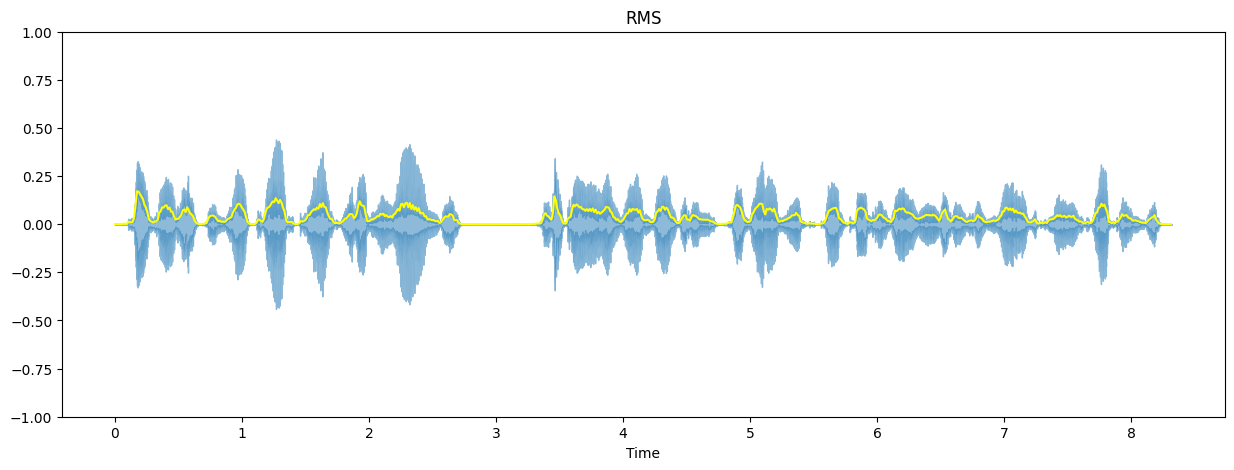

In [250]:
rms(sound, 256, 256)

# Amplitude frames minimum's and maximum's

In [251]:
def max_amplitude_envelopes(signal, frame_size, frame_hop):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), frame_hop)])

In [252]:
def min_amplitude_envelopes(signal, frame_size, frame_hop):
    return np.array([min(signal[i:i+frame_size]) for i in range(0, len(signal), frame_hop)])

In [253]:
def show_max_min_amplitude_envelopes(signal, frame_size, frame_hop):
    envelopes_max = max_amplitude_envelopes(signal, frame_size, frame_hop)
    envelopes_min = min_amplitude_envelopes(signal, frame_size, frame_hop)
    
    t = librosa.frames_to_time(range(len(envelopes_max)), hop_length=frame_hop)
    
    plt.figure(figsize=(15,5))
    librosa.display.waveshow(signal, alpha=0.5)
    plt.plot(t, envelopes_max, color="green")
    plt.plot(t, envelopes_min, color="red")
    plt.title("Signal maximum and minimum amplitudes")
    plt.ylim(-1,1)
    plt.show()

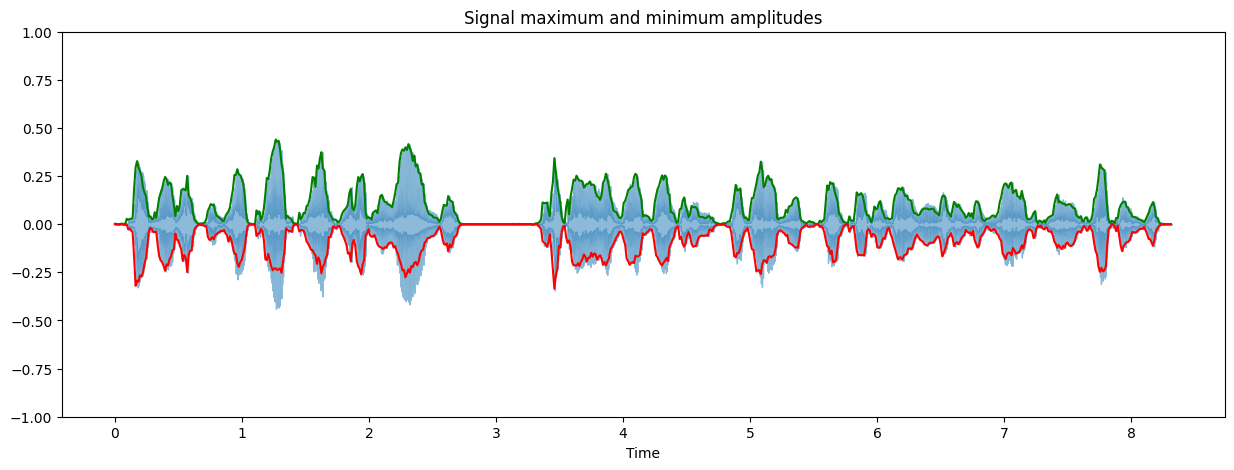

In [260]:
show_max_min_amplitude_envelopes(sound, 256, 256)

### Amplitude average

In [263]:
def avg_amplitude(signal):
    return sum(signal)/len(signal)

In [264]:
print("Average amplitude is {0:.6f}".format(avg_amplitude(sound)))

Average amplitude is -0.000015


# Find begginings and endings of noticable words

In [265]:
def noticable_sounds_detection(sound):
    onset_env = librosa.onset.onset_strength(y=sound)
    onsets = librosa.onset.onset_detect(onset_envelope=onset_env)
    onset_times = librosa.frames_to_time(onsets)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(sound, alpha=0.5)
    plt.vlines(onset_times, -1, 1, color='r', alpha=0.75, label='Onsets')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.title('Audio Onsets Detection')
    plt.grid()
    plt.legend()
    plt.show()

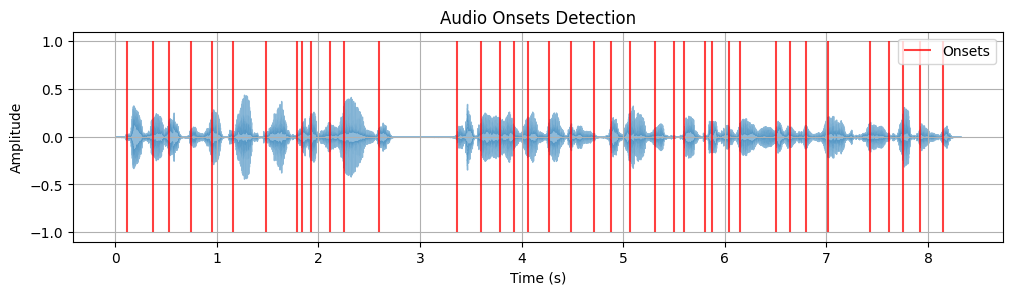

In [266]:
noticable_sounds_detection(sound)

# Zero crossing rate

In [267]:
def zero_crossing(signal, frame_size, frame_hop):
    zero_crossing = librosa.feature.zero_crossing_rate(signal, frame_length=frame_size, hop_length=frame_hop)
    
    t = librosa.frames_to_time(range(len(zero_crossing[0])), hop_length=frame_hop)
    
    plt.figure(figsize=(15,5))
    plt.plot(t, zero_crossing[0], color="purple")
    plt.title("Zero crossing rate")
    plt.ylim(0,1)
    plt.show()

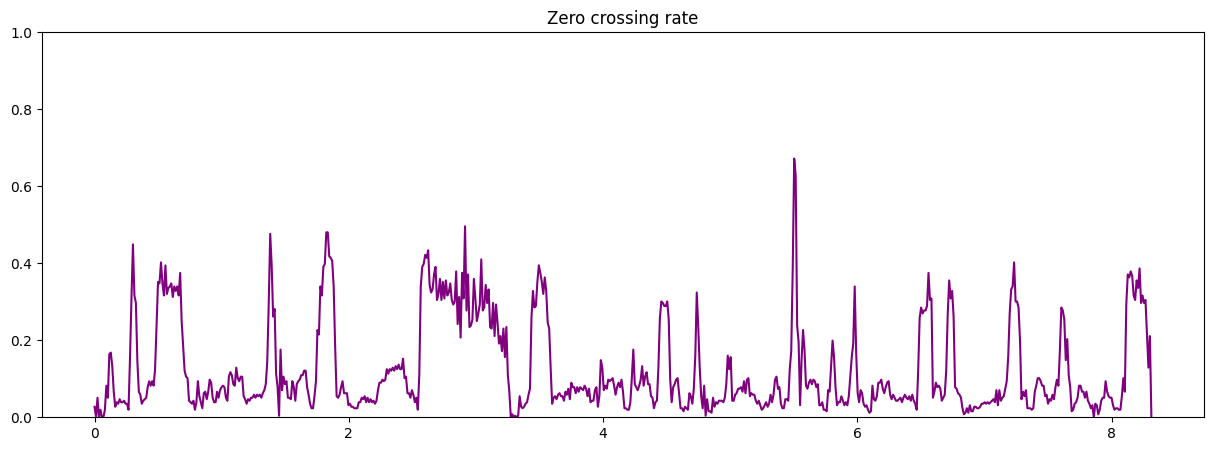

In [268]:
zero_crossing(sound, 256, 256)

# Signal analyzing in the frequency domain

In [269]:
def plot_spectrogram(signal, name):
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(10, 10))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

/tmp/ipykernel_32/3987116393.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal))


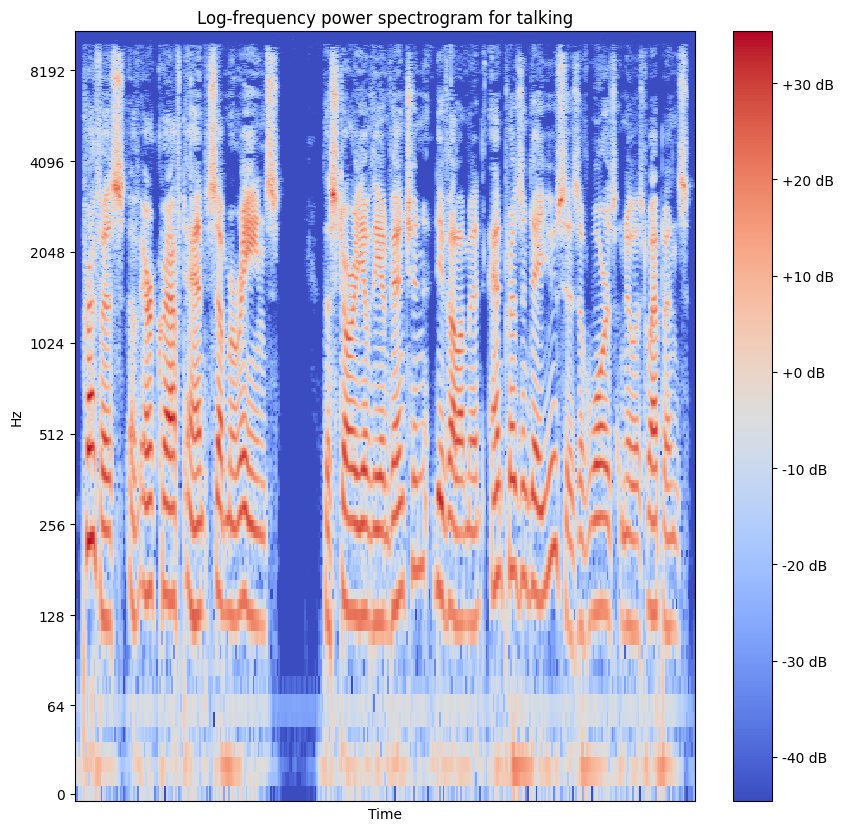

In [270]:
plot_spectrogram(sound, "talking")

# Fundamental frequency

In [271]:
def find_funamental_frequency(sound, name):
    pitches, magnitudes = librosa.piptrack(y=sound)
    f0 = []
    for i in range(pitches.shape[1]):
        index = magnitudes[:, i].argmax()
        f0.append(pitches[index, i])

    # Create a time vector
    frame_length = len(f0)
    times = np.linspace(0, len(sound) / 20050, frame_length)

    # Plot the F0 on a graph
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 2)
    plt.plot(times, f0, label='F0 (fundamental frequency)', color='b')
    plt.ylabel('F0 (Hz)')
    plt.xlabel('Time (s)')
    plt.title('Fundamental Frequency (F0) Estimation')
    plt.grid()
    plt.legend()
    plt.show()

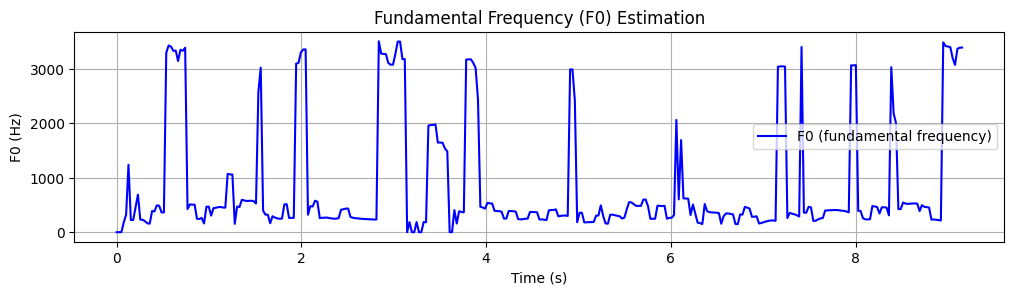

In [272]:
find_funamental_frequency(sound, "sound")